<a href="https://colab.research.google.com/github/DIFACQUIM/Fragment-libraries-from-large-synthetic-compounds-and-natural-products-collections/blob/main/SA_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

rdkit can not load Contrib directly,
so I should append the path to sys.path.
(Contrib/SA_Score/sascorer.py)
Example is below. https://github.com/rdkit/rdkit/issues/2279

##Estimation of synthetic accessibility score

In [167]:
# Install rdkit
from IPython.utils import io
import tqdm.notebook
total = 100
with tqdm.notebook.tqdm(total=total) as pbar:
    with io.capture_output() as captured:
      # Install rdkit
      !pip -q install rdkit
      pbar.update(100)

  0%|          | 0/100 [00:00<?, ?it/s]

In [168]:
import rdkit
print(f"rdkit_version: {rdkit.__version__}")

rdkit_version: 2024.09.5


In [169]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [170]:
#Import libraries

from rdkit import Chem
from rdkit.Chem import RDConfig
import os
import sys
sys.path.append(os.path.join(RDConfig.RDContribDir, 'SA_Score'))
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from rdkit.Chem import PandasTools

import matplotlib.pyplot as plt
import seaborn as sns

In [171]:
#Import SAscorer module
import sascorer
#Functions defining SA_score
def SA_score(smi): #smi=smiles
    mol = Chem.MolFromSmiles(smi) #mol = molecule
    SA = sascorer.calculateScore(mol) # synthetic accessibilit calculation
    SA = round(SA,3) #round of 3 decimales
    return SA


##Apply functions

In [172]:
# Example SAscore

#DATA["SA score"] = DATA["SMILES_chiral"].apply(SA_score)
#DATA.tail(2)

##Mount dataset - Compounds PN

In [173]:
# For database in .csv  (Mount of link)
# Compoundss - LANaPDB
url_data_lanapdb_Comp = "https://drive.google.com/file/d/18kt38eh8AjzbuenF77BHRUErNulfc7Hr/view?usp=sharing"
url_data_lanapdb_Comp='https://drive.google.com/uc?id=' + url_data_lanapdb_Comp.split('/')[-2]
Comp_descriptors_LANA = pd.read_csv(url_data_lanapdb_Comp)
Comp_descriptors_LANA = Comp_descriptors_LANA[["ID", "SMILES_chiral", "SA_score"]]
Comp_descriptors_LANA = Comp_descriptors_LANA.rename(columns={'SA_score': 'SA score'})
Comp_descriptors_LANA["Database"] = "LANaPDB"
Comp_descriptors_LANA.tail(2)

,ID,SMILES_chiral,SA score,Database
13576,LANaPDB13577,CC1C(=O)C[C@@]23COC(=O)C2=CCC[C@H]3[C@@]1(C)CC...,5.343,LANaPDB
13577,LANaPDB13578,O=C(c1ccc(O)cc1O)c1c(C(O)c2ccc(O)cc2O)cc2cc(O)...,3.399,LANaPDB


In [174]:
# For database in .csv  (Mount of google drive)
# Compounds - COCONUT
Comp_descriptors_COCO = pd.read_csv("/content/drive/MyDrive/Fragment_Analysis_sep_2024/DB_Compounds/COCONUT_2024_curated_molecular_descriptors.csv")
Comp_descriptors_COCO = Comp_descriptors_COCO[["SMILES_chiral", "SA score"]]
Comp_descriptors_COCO["Database"] = "COCONUT"
Comp_descriptors_COCO.tail(2)


,SMILES_chiral,SA score,Database
648719,COc1cc2[nH]c(=O)c(C(=O)NCCCc3ccccc3)c(O)c2cc1OC,2.137,COCONUT
648720,CCc1cc2c(=O)c(-c3nc4ccccc4s3)c(C(C)C)oc2cc1OC(...,2.721,COCONUT


## Mount dataset - Fragments RO3


In [175]:
# LANaPDB RO3
url_data = "https://raw.githubusercontent.com/DIFACQUIM/Fragment-libraries-from-large-synthetic-compounds-and-natural-products-collections/refs/heads/main/DATA_SET/DATA_FRAGMENTS_RO3/LANaPDB_RO3_Moleculardescriptors.csv"
lanapdb = pd.read_csv(url_data)
lanapdb = lanapdb[["ID", "SMILES_chiral", "SA_score"]]
lanapdb = lanapdb.rename(columns={'SA_score': 'SA score'})
lanapdb["Database"] = "LANaPDB"
lanapdb.tail(2)

,ID,SMILES_chiral,SA score,Database
1830,LANaPDB_fragments_73605,CC1(C)[C@H]2CCC[C@]3(CO3)[C@]2(C)C[C@H](O)[C@]...,5.030,LANaPDB
1831,LANaPDB_fragments_74033,CCC(C)=CC(=O)O,2.552,LANaPDB


In [176]:
# COCONUT RO3
url_data = "https://raw.githubusercontent.com/DIFACQUIM/Fragment-libraries-from-large-synthetic-compounds-and-natural-products-collections/refs/heads/main/DATA_SET/DATA_FRAGMENTS_RO3/COCONUT_RO3_Moleculardescriptors.csv"
coconut = pd.read_csv(url_data)
coconut = coconut[["ID", "SMILES_chiral", "SA_score", "Database"]]
coconut = coconut.rename(columns={'SA_score': 'SA score'})
coconut.tail(2)

,ID,SMILES_chiral,SA score,Database
38745,COCONUT_fragments_2583030,O=c1cco[nH]1,4.252,COCONUT
38746,COCONUT_fragments_2583083,O=CC1C=CCC1,4.156,COCONUT


In [177]:
# Enamine RO3
url_data = "https://raw.githubusercontent.com/DIFACQUIM/Fragment-libraries-from-large-synthetic-compounds-and-natural-products-collections/refs/heads/main/DATA_SET/DATA_FRAGMENTS_RO3/Enamine_RO3_Moleculardescriptors.csv"
Enamine = pd.read_csv(url_data)
Enamine = Enamine[["ID", "SMILES_chiral", "SA_score"]]
Enamine = Enamine.rename(columns={'SA_score': 'SA score'})
Enamine["Database"] = "Enamine"
Enamine.tail(2)

,ID,SMILES_chiral,SA score,Database
8384,Z212848872,CC1CN(C(=O)Cc2cccc(F)c2)CCO1,2.390,Enamine
8385,Z228588126,CC(C(=O)N1CCCCCC1)N1CCNCC1,2.499,Enamine


In [178]:
# ChemDiv RO3
url_data = "https://raw.githubusercontent.com/DIFACQUIM/Fragment-libraries-from-large-synthetic-compounds-and-natural-products-collections/refs/heads/main/DATA_SET/DATA_FRAGMENTS_RO3/ChemDiv_RO3_Moleculardescriptors.csv"
ChemDiv = pd.read_csv(url_data)
ChemDiv = ChemDiv[["ID", "SMILES_chiral", "SA_score", "Database"]]
ChemDiv = ChemDiv.rename(columns={'SA_score': 'SA score'})
ChemDiv.tail(2)

,ID,SMILES_chiral,SA score,Database
16721,BB01-0446,CC(C)N1CCC2(CC1)NC(=O)c1ccccc1O2,3.037,ChemDiv
16722,BB01-0451,CC(=O)N1C(C(=O)O)CSC1c1ccc(C)cc1,2.913,ChemDiv


In [179]:
# Maybridge RO3
url_data = "https://raw.githubusercontent.com/DIFACQUIM/Fragment-libraries-from-large-synthetic-compounds-and-natural-products-collections/refs/heads/main/DATA_SET/DATA_FRAGMENTS_RO3/Maybridge_RO3_Moleculardescriptors.csv"
Maybridge = pd.read_csv(url_data)
Maybridge = Maybridge[["ID", "SMILES_chiral", "SA_score", "Database"]]
Maybridge = Maybridge.rename(columns={'SA_score': 'SA score'})
Maybridge.tail(2)

,ID,SMILES_chiral,SA score,Database
5910,KM08807,O=C1CC2CCCC(C1)N2Cc1ccccc1,3.455,Maybridge
5911,SEW04324,O=C(c1ccccc1)C1CCN(C(=O)C(F)(F)F)CC1,1.960,Maybridge


In [180]:
# Life Chemicals RO3
url_data = "https://raw.githubusercontent.com/DIFACQUIM/Fragment-libraries-from-large-synthetic-compounds-and-natural-products-collections/refs/heads/main/DATA_SET/DATA_FRAGMENTS_RO3/LifeChemicals_RO3_Moleculardescriptors.csv"
LifeChemicals = pd.read_csv(url_data)
LifeChemicals = LifeChemicals[["ID", "SMILES_chiral", "SA_score"]]
LifeChemicals["Database"] = "Life Chemicals"
LifeChemicals = LifeChemicals.rename(columns={'SA_score': 'SA score'})
LifeChemicals.tail(2)

,ID,SMILES_chiral,SA score,Database
14732,F6782-0679,Cn1cc(C(=O)c2ccccc2)c(=O)c2cc(F)ccc21,1.901,Life Chemicals
14733,F0788-0005,c1cc[n+]2cc3n(c2c1)Cc1c[n+]2ccccc2n1C3,4.029,Life Chemicals


In [181]:
# CRAFT RO3
url_data = "https://raw.githubusercontent.com/DIFACQUIM/Fragment-libraries-from-large-synthetic-compounds-and-natural-products-collections/refs/heads/main/DATA_SET/DATA_FRAGMENTS_RO3/CRAFT_RO3_Moleculardescriptors.csv"
CRAFT = pd.read_csv(url_data)
CRAFT = CRAFT[["ID", "SMILES_chiral", "SA_score", "Database"]]
CRAFT = CRAFT.rename(columns={'SA_score': 'SA score'})
CRAFT.tail(2)

,ID,SMILES_chiral,SA score,Database
174,QHM-0000005,O=C1C=C(Cl)C(=O)c2ccccc21,2.068,CRAFT
175,QHM-0000002,CC1(C)CCC2=C(O1)c1ccccc1C(=O)C2=O,2.624,CRAFT


## Mount dataset - Fragments

In [182]:
# LANaPDB Fragments
url_data = "https://raw.githubusercontent.com/DIFACQUIM/Fragment-libraries-from-large-synthetic-compounds-and-natural-products-collections/refs/heads/main/DATA_SET/DATA_FRAGMENTS/LANaPDB_Moleculardescriptors.csv"
Fraglanapdb = pd.read_csv(url_data)
Fraglanapdb = Fraglanapdb[["ID", "SMILES_chiral", "SA_score"]]
Fraglanapdb = Fraglanapdb.rename(columns={'SA_score': 'SA score'})
Fraglanapdb["Database"] = "LANaPDB"
Fraglanapdb.tail(2)

,ID,SMILES_chiral,SA score,Database
74191,LANaPDB_fragments_74192,C=C[C@@]1(C)CC(=O)C2[C@](C)(O1)C(OC(C)=O)C(O)C...,4.975,LANaPDB
74192,LANaPDB_fragments_74193,O=C(c1ccc(O)cc1O)c1cc2cc(O)c(O)cc2cc1C(O)c1ccc...,3.239,LANaPDB


In [183]:
# Enamine Fragments
url_data = "https://raw.githubusercontent.com/DIFACQUIM/Fragment-libraries-from-large-synthetic-compounds-and-natural-products-collections/refs/heads/main/DATA_SET/DATA_FRAGMENTS/Enamine_Moleculardescriptors.csv"
FragEnamine = pd.read_csv(url_data)
FragEnamine = FragEnamine[["ID", "SMILES_chiral", "SA_score"]]
FragEnamine = FragEnamine.rename(columns={'SA_score': 'SA score'})
FragEnamine["Database"] = "Enamine"
FragEnamine.tail(2)

,ID,SMILES_chiral,SA score,Database
12494,Z212848872,CC1CN(C(=O)Cc2cccc(F)c2)CCO1,2.390,Enamine
12495,Z228588126,CC(C(=O)N1CCCCCC1)N1CCNCC1,2.499,Enamine


In [184]:
# ChemDiv Fragments
url_data = "https://raw.githubusercontent.com/DIFACQUIM/Fragment-libraries-from-large-synthetic-compounds-and-natural-products-collections/refs/heads/main/DATA_SET/DATA_FRAGMENTS/ChemDiv_Moleculardescriptors.csv"
FragChemDiv = pd.read_csv(url_data)
FragChemDiv = FragChemDiv[["ID", "SMILES_chiral", "SA_score", "Database"]]
FragChemDiv = FragChemDiv.rename(columns={'SA_score': 'SA score'})
FragChemDiv.tail(2)

,ID,SMILES_chiral,SA score,Database
72354,BB20-6011,Cn1c(O)cc2cc(C(=O)O)ccc21,2.296,ChemDiv
72355,BB52-8550,N#[N+][N-]Cc1ccc(O)c2ncccc12,3.507,ChemDiv


In [185]:
# Maybridge Fragments
url_data = "https://raw.githubusercontent.com/DIFACQUIM/Fragment-libraries-from-large-synthetic-compounds-and-natural-products-collections/refs/heads/main/DATA_SET/DATA_FRAGMENTS/Maybridge_Moleculardescriptors.csv"
FragMaybridge = pd.read_csv(url_data)
FragMaybridge = FragMaybridge[["ID", "SMILES_chiral", "SA_score", "Database"]]
FragMaybridge = FragMaybridge.rename(columns={'SA_score': 'SA score'})
FragMaybridge.tail(2)

,ID,SMILES_chiral,SA score,Database
29850,SEW04324,O=C(c1ccccc1)C1CCN(C(=O)C(F)(F)F)CC1,1.960,Maybridge
29851,SB00513,N=c1[nH][nH]c(=S)[nH]1,4.781,Maybridge


In [186]:
# Life Chemicals Fragments
url_data = "https://raw.githubusercontent.com/DIFACQUIM/Fragment-libraries-from-large-synthetic-compounds-and-natural-products-collections/refs/heads/main/DATA_SET/DATA_FRAGMENTS/LifeChemicals_Moleculardescriptors.csv"
FragLifeChemicals = pd.read_csv(url_data)
FragLifeChemicals = FragLifeChemicals[["ID", "SMILES_chiral", "SA_score", "Database"]]
FragLifeChemicals = FragLifeChemicals.rename(columns={'SA_score': 'SA score'})
FragLifeChemicals.tail(2)

,ID,SMILES_chiral,SA score,Database
65246,F1604-0680,Cc1ccccc1-c1n[nH]n2c1nc(=O)c1ccccc12,2.389,LifeChemicals
65247,F1601-0235,O=c1c2ccccc2n2nncc2n1Cc1cccc(F)c1,2.438,LifeChemicals


In [187]:
# CRAFT Fragments
url_data = "https://raw.githubusercontent.com/DIFACQUIM/Fragment-libraries-from-large-synthetic-compounds-and-natural-products-collections/refs/heads/main/DATA_SET/DATA_FRAGMENTS/CRAFT_Moleculardescriptors.csv"
FragCRAFT = pd.read_csv(url_data)
FragCRAFT = FragCRAFT[["ID", "SMILES_chiral", "SA_score", "Database"]]
FragCRAFT = FragCRAFT.rename(columns={'SA_score': 'SA score'})
FragCRAFT.tail(2)

,ID,SMILES_chiral,SA score,Database
1200,QHM-0000003,[N-]=[N+]=NC1=C(Cl)C(=O)c2ccccc2C1=O,2.788,CRAFT
1201,QHM-0000002,CC1(C)CCC2=C(O1)c1ccccc1C(=O)C2=O,2.624,CRAFT


In [188]:
# COCONUT Fragments (Mount of google drive)
FragCOCONUT = pd.read_csv("/content/drive/MyDrive/Fragment_Analysis_sep_2024/DB_Fragmentos/Fragmentos generados/COCONUT_fragments_1000Da_molecular_descriptors.csv")
FragCOCONUT = FragCOCONUT[["ID", "SMILES_chiral", "SA score"]]
FragCOCONUT["Database"] = "COCONUT"
FragCOCONUT.tail(2)

<ipython-input-188-0e8b5d35b68c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FragCOCONUT["Database"] = "COCONUT"


,ID,SMILES_chiral,SA score,Database
2583125,COCONUT_fragments_2583126,O=C1CCC(O)C(O)(C(=O)OCc2cc(O)ccc2OC2OC(COC(=O)...,4.895,COCONUT
2583126,COCONUT_fragments_2583127,CC1=C[C@H](O)C(C)(C)CCC[C@@](C)(O)CCC1,4.143,COCONUT


## Plot results

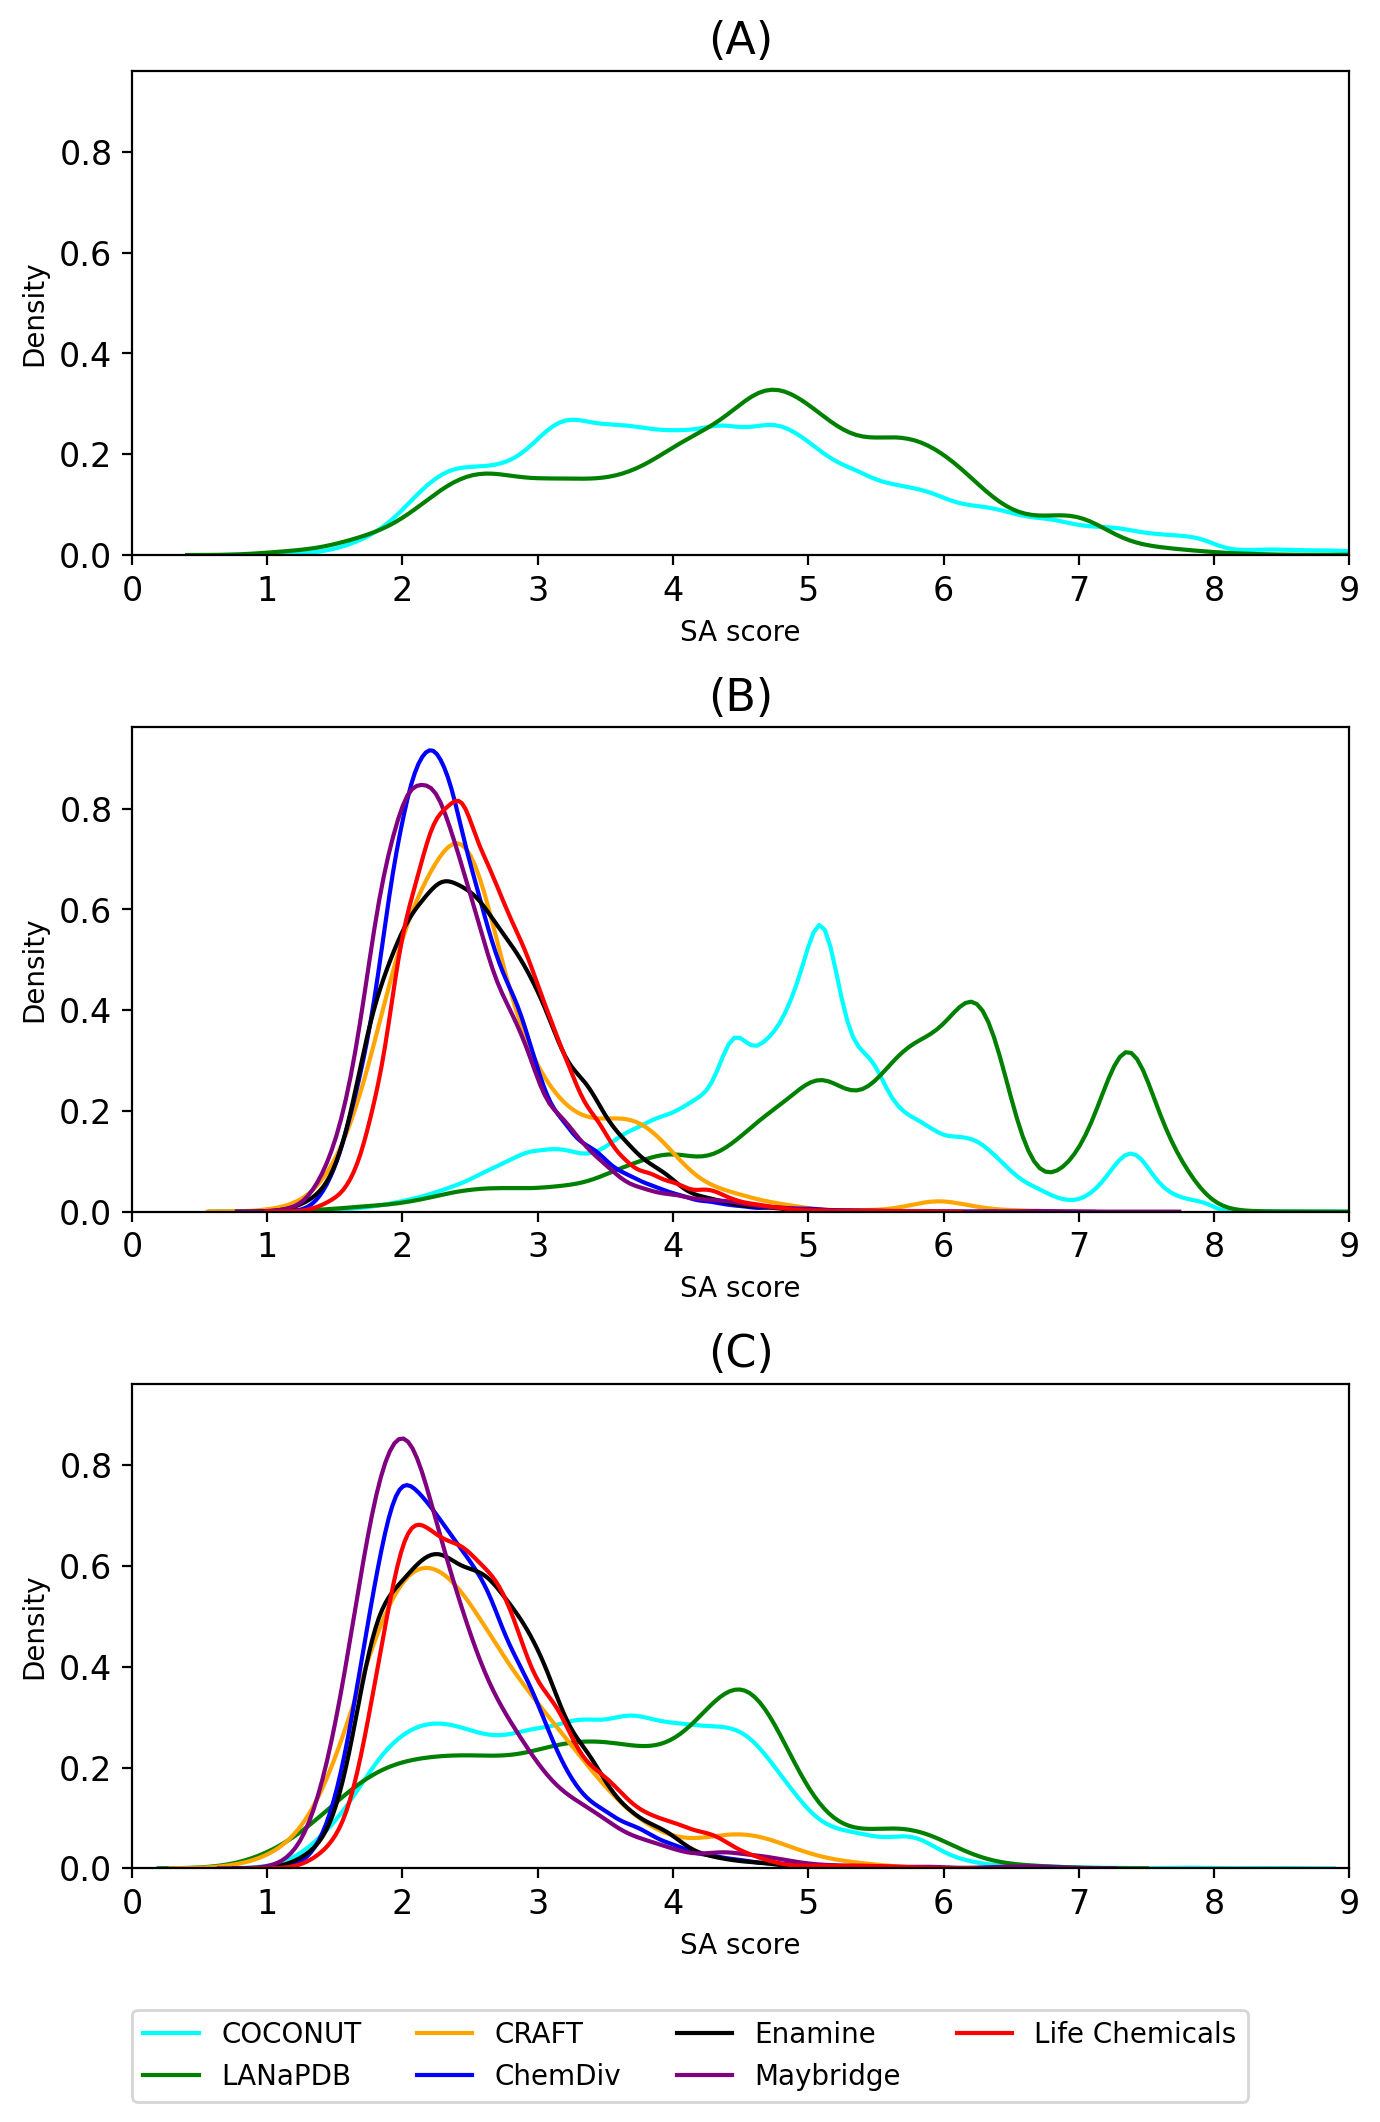

In [191]:

fig, ax = plt.subplots(3,1, figsize=(7,10), dpi=200, sharey=True)

#Compounds
sns.kdeplot(data=Comp_descriptors_COCO, x="SA score",  c="cyan", linestyle='-', ax=ax[0])
sns.kdeplot(data=Comp_descriptors_LANA, x="SA score",  c="green", linestyle='-', ax=ax[0])

#Fragments
sns.kdeplot(data=FragCOCONUT, x="SA score",  label="COCONUT",  c="cyan", linestyle='-', ax=ax[1])
sns.kdeplot(data=Fraglanapdb, x="SA score",  label="LANaPDB",  c="green", linestyle='-', ax=ax[1])
sns.kdeplot(data=FragCRAFT, x="SA score", label="CRAFT",  c="orange", linestyle='-', ax=ax[1])
sns.kdeplot(data=FragChemDiv, x="SA score", label="ChemDiv",  c="blue", linestyle='-', ax=ax[1])
sns.kdeplot(data=FragEnamine, x="SA score", label="Enamine",  c="black", linestyle='-', ax=ax[1])
sns.kdeplot(data=FragMaybridge, x="SA score", label="Maybridge",  c="purple", linestyle='-', ax=ax[1])
sns.kdeplot(data=FragLifeChemicals, x="SA score", label="Life Chemicals",  c="red", linestyle='-', ax=ax[1])

#Fragments RO3
sns.kdeplot(data=coconut, x="SA score",  c="cyan", linestyle='-', ax=ax[2])
sns.kdeplot(data=lanapdb, x="SA score",  c="green", linestyle='-', ax=ax[2])
sns.kdeplot(data=CRAFT, x="SA score",  c="orange", linestyle='-', ax=ax[2])
sns.kdeplot(data=ChemDiv, x="SA score", c="blue", linestyle='-', ax=ax[2])
sns.kdeplot(data=Enamine, x="SA score", c="black", linestyle='-', ax=ax[2])
sns.kdeplot(data=Maybridge, x="SA score", c="purple", linestyle='-', ax=ax[2])
sns.kdeplot(data=LifeChemicals, x="SA score", c="red", linestyle='-', ax=ax[2])

plt.rc('xtick',labelsize=12) # Change the font size of the scale numbers in X
plt.rc('ytick',labelsize=12) # Change the font size of the scale numbers in Y

ax[0].set_xlim(0, 9)
ax[1].set_xlim(0, 9)
ax[2].set_xlim(0, 9)

ax[0].set_title("(A)", fontsize=16)
ax[1].set_title("(B)", fontsize=16)
ax[2].set_title("(C)", fontsize=16)

fig.tight_layout()

fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.01), borderaxespad=0, ncol = 4, fontsize=10,)

fig.savefig("Figure_7.jpg", dpi=400, bbox_inches='tight', pad_inches=0)